In [1]:
import numpy as np

In [2]:
#将X，y赋值为np数组
X = np.array([[0, 1, 0, 1], 
              [1, 1, 1, 0], 
              [0, 1, 1, 0], 
              [0, 0, 0, 1], 
              [0, 1, 1, 0], 
              [0, 1, 0, 1], 
              [1, 0, 0, 1]])
y = np.array( [0, 1, 1, 0, 1, 0, 0])

In [3]:
#对不同分类计算每个特征为1的数量
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print("feature counts:\n{}".format(counts))

feature counts:
{0: array([1, 2, 0, 4]), 1: array([1, 3, 3, 0])}


In [4]:
from sklearn.naive_bayes import BernoulliNB

In [5]:
clf = BernoulliNB()
clf.fit(X, y)
#要进行预测的这一天，没有刮北风，也不闷热
#但是多云，天气预报没有说有雨
Next_Day = [[0, 0, 1, 0]]
pre = clf.predict(Next_Day)
if pre == [1]:
    print("要下雨啦，快收衣服啊！")
else:
    print("放心，又是一个艳阳天")

要下雨啦，快收衣服啊！


In [6]:
Another_day = [[1, 1, 0, 1]]
pre2 = clf.predict(Another_day)
if pre2 == [1]:
    print("要下雨啦，快收衣服啊！")
else:
    print("放心，又是一个艳阳天")

放心，又是一个艳阳天


In [7]:
clf.predict_proba(Next_Day)

array([[ 0.13848881,  0.86151119]])

In [8]:
clf.predict_proba(Another_day)

array([[ 0.92340878,  0.07659122]])

In [57]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X, y = make_blobs(n_samples=500, centers=5,random_state=8)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=8)
nb = BernoulliNB()
nb.fit(X_train,y_train)
print('模型得分：{:.3f}'.format(nb.score(X_test, y_test)))

模型得分：0.544


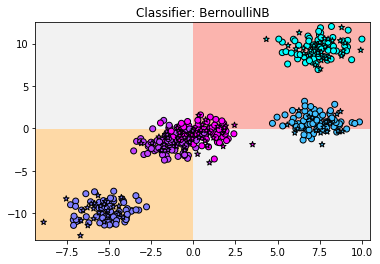

In [58]:
import matplotlib.pyplot as plt
x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
xx,yy = np.meshgrid(np.arange(x_min, x_max,.02),
                    np.arange(y_min, y_max, .02))
z = nb.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolor='k')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,marker='*',
            edgecolor='k')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('Classifier: BernoulliNB')
plt.show()

In [59]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('模型得分：{:.3f}'.format(gnb.score(X_test, y_test)))

模型得分：0.968


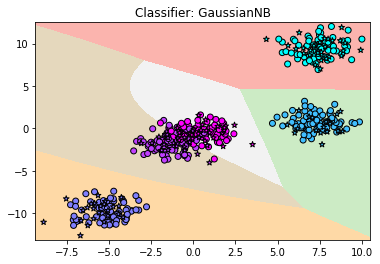

In [62]:
z = gnb.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolor='k')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,marker='*',
            edgecolor='k')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('Classifier: GaussianNB')
plt.show()

In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train_scaled, y_train)
print('模型得分：{:.3f}'.format(mnb.score(X_test_scaled, y_test)))

模型得分：0.320


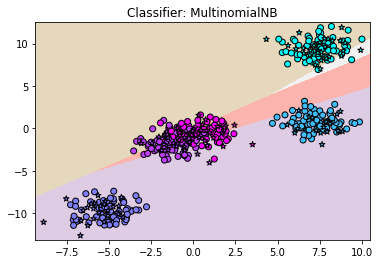

In [67]:
z = mnb.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolor='k')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,marker='*',
            edgecolor='k')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('Classifier: MultinomialNB')
plt.show()

In [76]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [78]:
print('肿瘤的分类：',cancer['target_names'])
print('\n肿瘤的特征：\n',cancer['feature_names'])

肿瘤的分类： ['malignant' 'benign']

肿瘤的特征：
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [79]:
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)
print('训练集数据形态：',X_train.shape)
print('测试集数据形态：',X_test.shape)

训练集数据形态： (426, 30)
测试集数据形态： (143, 30)


In [81]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('训练集得分：{:.3f}'.format(gnb.score(X_train, y_train)))
print('测试集得分：{:.3f}'.format(gnb.score(X_test, y_test)))

训练集得分：0.948
测试集得分：0.944


In [92]:
print('模型预测的分类是：{}'.format(gnb.predict([X[312]])))
print('样本的正确分类是：',y[312])

模型预测的分类是：[1]
样本的正确分类是： 1


In [97]:
gnb.predict_proba([X[312]])

array([[  2.80146748e-14,   1.00000000e+00]])

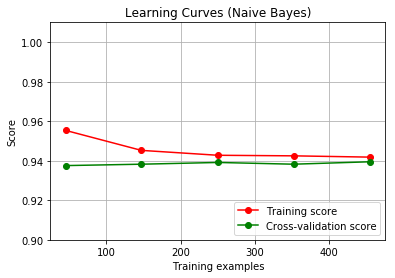

In [111]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt

title = "Learning Curves (Naive Bayes)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.9, 1.01), cv=cv, n_jobs=4)
plt.show()